In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:
path_mpi  = '/f2/haboob/home/shared/Haboob_SERDP/CMIP5_MPI_Hires'
data      = Dataset(path_mpi+'/wrfout_d03_2000-07-16_06:00:00')
lon       = data.variables['XLONG'][0,:,:]
lat       = data.variables['XLAT'][0,:,:]
precip    = data.variables['RAINNC'][:,:,:]

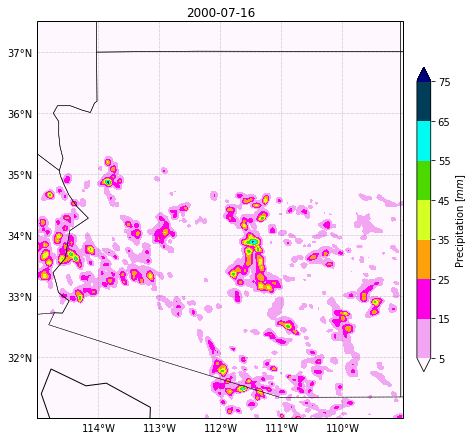

In [6]:
# set the projection for the map
projection = ccrs.PlateCarree()

# start a figure named fig, set axis name, dimesions of fig, and projection
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 8),
                       subplot_kw={'projection': projection})

## AX1
# set levels for colorbar
levels = np.arange(5,85,10)
# plot filled contours (contourf) onto ax1
cs = ax1.contourf(lon, lat, precip[-1,:,:],
                  transform=projection,
                  cmap='gist_ncar_r',levels=levels,
                  extend='both')

# add color bar
labels = [str(item) for item in levels]
cax,kw = matplotlib.colorbar.make_axes(ax1,ticks=levels,location='right',pad=0.03,shrink=0.7)
cbar = fig.colorbar(cs,cax=cax,**kw)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Precipitation $[mm]$',size=10)

# crop extent of map to lat/lon of data
extent = [-115, -109,
          31.0,37.5]
ax1.set_extent(extent)

# add lat lon gridline
gl = ax1.gridlines(draw_labels=True,
             xlocs=np.arange(-180, 180, 1.),
             ylocs=np.arange(-90, 90, 1.),
             linewidth=0.5, color='k', alpha=0.5, linestyle=':')
gl.xlabels_top = None
gl.ylabels_right = None
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# set plot title
ax1.set_title('2000-07-16', loc='center',pad=5,fontsize=12) 

# add map features to plot
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.STATES,linewidth=0.5)
ax1.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.5)

# save plot to same directory as script
plotfile = 'test_plot.png'
sf = fig.savefig(plotfile, dpi=300, bbox_inches='tight')
plt.show()